# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [4]:
import os
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [8]:
baby_names = pd.read_csv(os.path.join('lab09_files', 'US_Baby_Names_right.csv'))

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [31]:
print(baby_names.dtypes)
print(f'Len of dataset is {len(baby_names)}')
baby_names.info()

Name      object
Year       int64
Gender    object
State     object
Count      int64
dtype: object
Len of dataset is 1016395
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 5 columns):
Name      1016395 non-null object
Year      1016395 non-null int64
Gender    1016395 non-null object
State     1016395 non-null object
Count     1016395 non-null int64
dtypes: int64(2), object(3)
memory usage: 38.8+ MB


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [ ]:
display(baby_names.head(10))

Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [13]:
baby_names.drop(labels=['Unnamed: 0', 'Id'], axis=1, inplace=True)
display(baby_names)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
5,Abigail,2004,F,AK,37
6,Olivia,2004,F,AK,33
7,Isabella,2004,F,AK,30
8,Alyssa,2004,F,AK,29
9,Sophia,2004,F,AK,28


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [36]:
display(baby_names.groupby(['Gender'])['Count'].count())

Gender
F    558846
M    457549
Name: Count, dtype: int64

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [96]:
grouped = baby_names.groupby(['Name']).agg({'Count':sum})['Count']
nlargest = grouped.nlargest(10)
display(nlargest)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

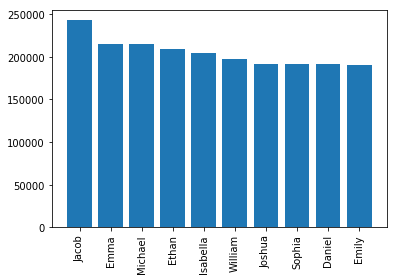

In [98]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame({'Name': nlargest.index, 'Count':nlargest.values})
plt.bar(df['Name'], df['Count'])
plt.xticks(df['Name'], rotation='vertical')
plt.show()

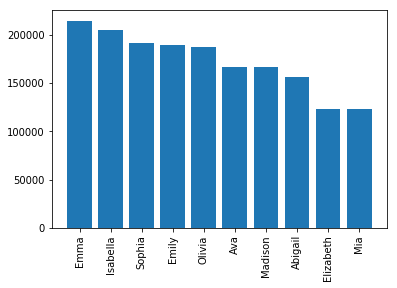

In [103]:
grouped_by_gender = baby_names.groupby(['Gender', 'Name']).agg({'Count':sum})['Count']
females = grouped_by_gender['F'].nlargest(10)

df = pd.DataFrame({'Name': females.index, 'Count':females.values})
plt.bar(df['Name'], df['Count'])
plt.xticks(rotation='vertical')
plt.show()

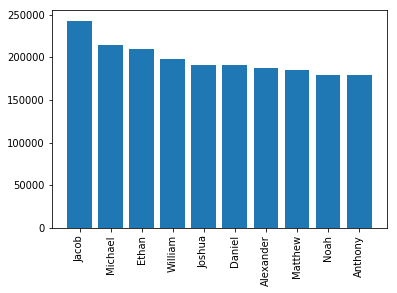

In [101]:
males = grouped_by_gender['M'].nlargest(10)

df = pd.DataFrame({'Name': males.index, 'Count':males.values})
plt.bar(df['Name'], df['Count'])
plt.xticks(rotation='vertical')
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [104]:
print(len(baby_names['Name'].unique()))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [129]:
grouped = baby_names.groupby(['Name']).agg({'Count':sum})['Count']
s = grouped.sum()
probs = grouped / s
df = pd.DataFrame({'Name': grouped.index, 'Probs':probs.values})
for _ in range(5):
    display(df.sample(n=1, weights=df['Probs']))

,Name,Probs
14668,Sarah,0.002499


,Name,Probs
3782,Colin,0.001133


,Name,Probs
6030,Gavin,0.002925


,Name,Probs
4201,Dante,0.000369


,Name,Probs
4641,Destiny,0.001392


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [131]:
baby_names['Name'].describe()

count     1016395
unique      17632
top         Riley
freq         1112
Name: Name, dtype: object

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

In [ ]:
Krok 10: Przygotuj efektywny wykres na którym przedstawisz śred